## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [28]:
from sklearn import tree
from sklearn import datasets
import pydotplus as pdp
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import graphviz

**決策分類樹**

In [16]:
#wine dataset
wine=datasets.load_wine()

X=wine.data
y=wine.target
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3)

In [20]:
print(f'feature name : {wine.feature_names}\n')
print(f'target name :{wine.target_names}')

feature name : ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

target name :['class_0' 'class_1' 'class_2']


In [17]:
X_train.shape,X_test.shape

((124, 13), (54, 13))

In [18]:
Y_train.shape,Y_test.shape

((124,), (54,))

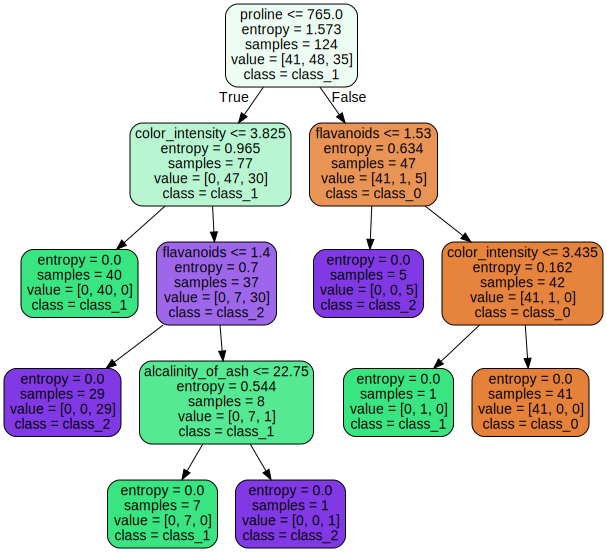

In [21]:
clf=tree.DecisionTreeClassifier(criterion='entropy').fit(X_train,Y_train)

feature_name = [_ for _ in wine.feature_names]

dot_data = tree.export_graphviz(clf
                                ,out_file = None
                                ,feature_names= feature_name
                                ,class_names=[_ for _ in wine.target_names]
                                ,filled=True 
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [22]:
#查看重要特徵性
clf.feature_importances_
[*zip(feature_name,clf.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.022293494031840642),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.22824929349884668),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.282974340791645),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.46648287167766767)]

In [23]:
#return leaf index
clf.apply(X_test)

array([12,  2, 12,  4,  6,  6,  2, 12,  4,  4,  9,  2,  2, 12,  4,  9,  2,
       12, 12,  2,  4, 12, 11,  2, 12,  4,  6, 12,  6,  4,  4,  7,  2,  2,
        6,  2, 12,  2, 12,  2,  4, 11,  4,  4,  2,  4,  2, 12, 12, 12, 12,
        2,  6,  2])

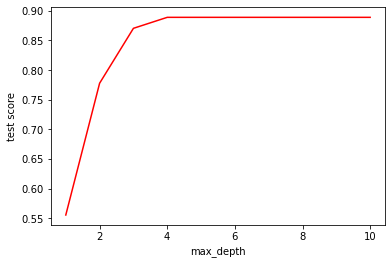

In [24]:
#調整最高生長層
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                      ,criterion="entropy"
                                      ,random_state=200
                                      ,splitter="random"
                                     )
    clf = clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    test.append(score)
plt.xlabel('max_depth'), plt.ylabel('test score')
plt.plot(range(1,11),test,color="red")
plt.show()

**決策回歸樹**

In [29]:
boston = datasets.load_boston()

regressor = tree.DecisionTreeRegressor(random_state=0)

cross_val_score(regressor, boston.data, boston.target, cv=10,
                scoring = "neg_mean_squared_error")

array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

In [30]:
X = boston.data
y = boston.target
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3)

In [33]:
regressor.fit(X,y)

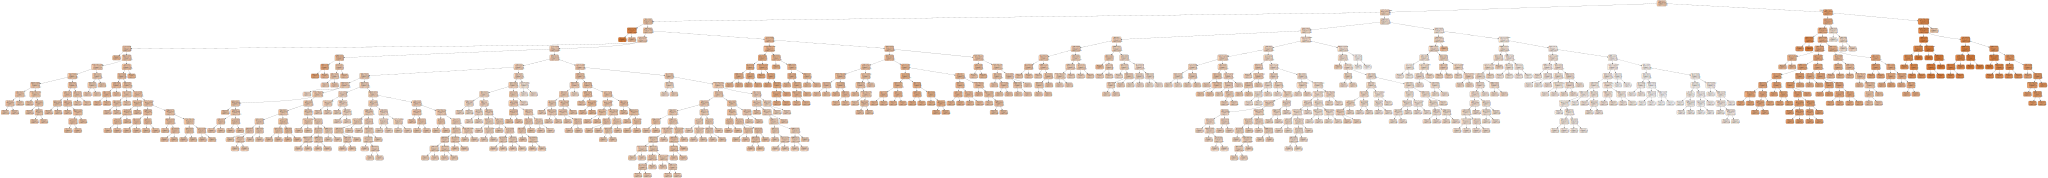

In [37]:
#不小心畫太大顆
feature_name = [_ for _ in boston.feature_names]

dot_data = tree.export_graphviz(regressor, out_file=None, 
                         feature_names=feature_name,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

In [42]:
ypred = regressor.predict(X_test)

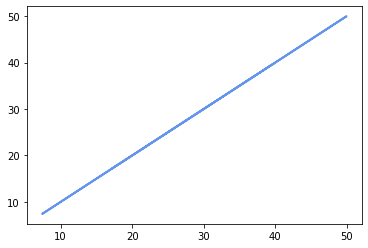

In [49]:
plt.plot(Y_test, ypred, color="cornflowerblue", linewidth=2)
plt.show()